# Project Description: 
Business Context 
In the dynamic and highly competitive airline industry, companies like IndiGo are continuously 
striving to enhance customer experience and build lasting loyalty. A critical component of this 
effort is understanding and predicting passenger referrals, which can significantly influence the 
airline's market position and reputation. The analysis of passenger reviews from 2006 to 2019 
offers IndiGo a comprehensive view into the various facets of the travel experience as perceived 
by their customers. These reviews provide invaluable feedback on service quality, including 
comfort, service, and overall value, and play a key role in shaping potential customers' 
perceptions. 
By leveraging this extensive dataset, IndiGo aims to develop a predictive model to identify which 
passengers are most likely to recommend the airline to others. This insight enables IndiGo to: 
1. Enhance Customer Experience: 
By pinpointing the factors that most influence positive referrals, IndiGo can focus on improving 
these aspects of their service, ensuring that they meet or exceed customer expectations. 
2. Targeted Improvements: 
The ability to predict referrals allows IndiGo to address specific areas needing improvement, 
whether it be in-flight comfort, customer service, or overall value for money. 
3. Strategic Marketing: 
Understanding referral patterns can help IndiGo tailor their marketing strategies to leverage 
positive word-of-mouth and foster a strong brand reputation. 
4. Competitive Edge: 
By continuously refining their services based on customer feedback, IndiGo can differentiate 
itself from competitors and strengthen its position in the market. 

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 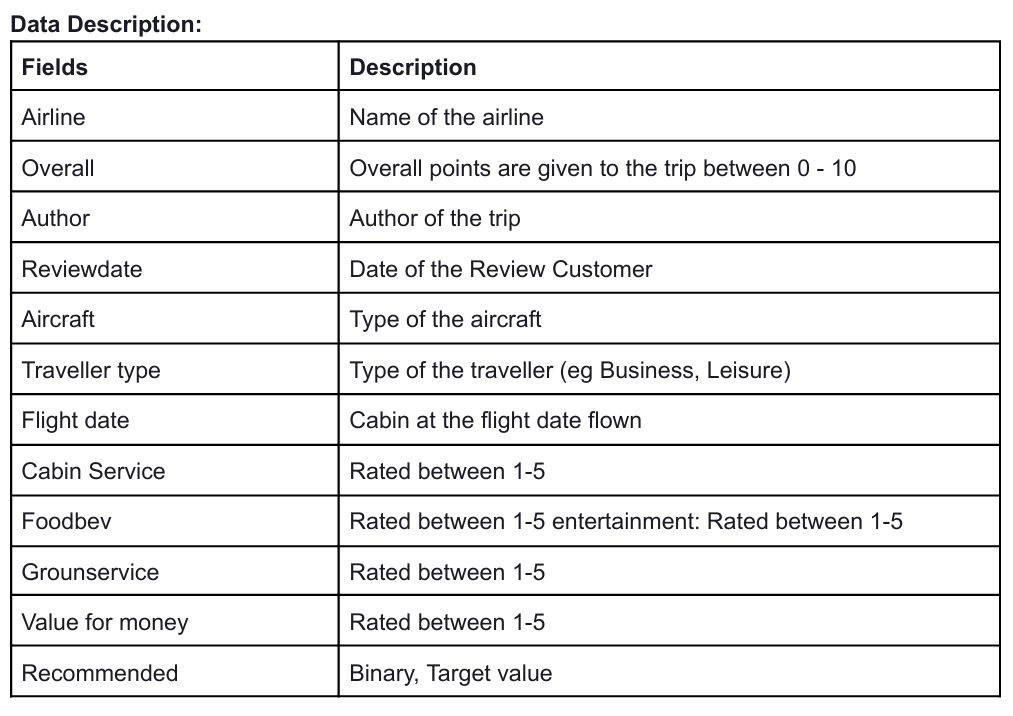

## Load Dataset

In [6]:
df = pd.read_csv("updated_Airline_data.csv")
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


### Data Cleaning

In [8]:
df.shape

(14215, 19)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14215.0,56726.524376,36332.796264,7.0,25996.0,54269.0,85870.0,131712.0
overall,14215.0,6.483152,3.050922,1.0,4.0,8.0,9.0,10.0
seat_comfort,14215.0,3.492719,1.336645,1.0,3.0,4.0,5.0,5.0
cabin_service,14215.0,3.742948,1.417064,1.0,3.0,4.0,5.0,5.0
food_bev,14215.0,3.318044,1.425094,1.0,2.0,4.0,5.0,5.0
entertainment,14215.0,3.333873,1.398894,1.0,2.0,4.0,5.0,5.0
ground_service,14215.0,3.468801,1.412519,1.0,2.0,4.0,5.0,5.0
value_for_money,14215.0,3.564756,1.402578,1.0,3.0,4.0,5.0,5.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [12]:
df.isnull().sum()

Unnamed: 0            0
airline               0
overall               0
author                0
review_date           0
customer_review       0
aircraft              0
traveller_type        0
cabin                 0
date_flown            0
seat_comfort          0
cabin_service         0
food_bev              0
entertainment         0
ground_service        0
value_for_money       0
recommended           0
sentiment             0
aircraft_brands    5706
dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'sentiment',
       'aircraft_brands'],
      dtype='object')

In [14]:
for i in df.columns:
    print(i,"\n",df[i].unique(),"\n")

Unnamed: 0 
 [     7     15     17 ... 131696 131702 131712] 

airline 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Ai

In [15]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [17]:
#Changing data types
df['overall'] = df['overall'].astype(int)
df['seat_comfort'] = df['seat_comfort'].astype(int)
df['cabin_service'] = df['cabin_service'].astype(int)
df['food_bev'] = df['food_bev'].astype(int)
df['entertainment'] = df['entertainment'].astype(int)
df['ground_service'] = df['ground_service'].astype(int)
df['value_for_money'] = df['value_for_money'].astype(int)

In [18]:
import re
#Remove day suffixes (like 'st', 'nd', 'rd', 'th')
df['review_date'] = df['review_date'].apply(lambda x: re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', x))

df['review_date'] = pd.to_datetime(df['review_date'], format='%d %B %Y')


In [19]:
df['review_date'] = df['review_date'].dt.date

In [20]:
df['review_date'] = df['review_date'].apply(lambda x: x.strftime('%d %B %Y'))

In [21]:
for i in df.columns:
    print(i,"\n",df[i].unique(),"\n")

Unnamed: 0 
 [     7     15     17 ... 131696 131702 131712] 

airline 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Ai

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       14215 non-null  int64 
 1   airline          14215 non-null  object
 2   overall          14215 non-null  int32 
 3   author           14215 non-null  object
 4   review_date      14215 non-null  object
 5   customer_review  14215 non-null  object
 6   aircraft         14215 non-null  object
 7   traveller_type   14215 non-null  object
 8   cabin            14215 non-null  object
 9   date_flown       14215 non-null  object
 10  seat_comfort     14215 non-null  int32 
 11  cabin_service    14215 non-null  int32 
 12  food_bev         14215 non-null  int32 
 13  entertainment    14215 non-null  int32 
 14  ground_service   14215 non-null  int32 
 15  value_for_money  14215 non-null  int32 
 16  recommended      14215 non-null  object
 17  sentiment        14215 non-null

In [23]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4,5,5,5,5,5,yes,positive,NaN
1,15,Turkish Airlines,2,S Gonser,29 April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3,3,2,3,1,2,no,positive,Boeing
2,17,Turkish Airlines,6,Sami Osman,29 April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2,3,3,3,3,3,yes,positive,Boeing
3,19,Turkish Airlines,1,Norka Idalia Orlando,28 April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1,1,1,1,1,1,no,negative,NaN
4,29,Turkish Airlines,2,Trevor Khurana,24 April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1,3,2,2,1,1,no,positive,Boeing


In [24]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'sentiment',
       'aircraft_brands'],
      dtype='object')

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14215.0,56726.524376,36332.796264,7.0,25996.0,54269.0,85870.0,131712.0
overall,14215.0,6.483152,3.050922,1.0,4.0,8.0,9.0,10.0
seat_comfort,14215.0,3.492719,1.336645,1.0,3.0,4.0,5.0,5.0
cabin_service,14215.0,3.742948,1.417064,1.0,3.0,4.0,5.0,5.0
food_bev,14215.0,3.318044,1.425094,1.0,2.0,4.0,5.0,5.0
entertainment,14215.0,3.333873,1.398894,1.0,2.0,4.0,5.0,5.0
ground_service,14215.0,3.468801,1.412519,1.0,2.0,4.0,5.0,5.0
value_for_money,14215.0,3.564756,1.402578,1.0,3.0,4.0,5.0,5.0


In [26]:
df['aircraft_brands'].unique()

array([nan, 'Boeing', 'Boeing, er', 'and, Boeing', 'Boeing, and',
       'Sharklets', 'dreamliner', 'and', 'Boeing, Boeing', 'Several',
       'Airbus, Airbus', 'Airbus', 'Boeing, then', 'Airbus, Boeing',
       'Boeing, and, Boeing', 'feb', 'Boeing, Dreamliner', 'oeing',
       'Boeing, Dreamliner, and', 'Beoing', 'er', 'Boeing, lr',
       'Emirates', 'Boeing, Er', 'Boing', 'Boeing, Neo', 'Dash, Boeing',
       'Embraer', 'sharklets', 'neo', 'Fokker', 'Boeing, Embraer',
       'Boeing, normal, and, Combi', 'Boeing, Combi', 'Fokker, Boeing',
       'Boeing, and, Embraer', 'Dreamliner', 'Boeing, combi',
       'Combi, Rio, De, Janeiro', 'Super', 'Airplane', 'believe',
       'Embrear', 'Boeing, Max', 'Unknown', 'Dash, and, Airbus',
       'transcontinental', 'not, known', 'Boeeing', 'Bombardier',
       'Canadair, Boeing', 'and, Canadiar', 'Uknown', 'Embraer, Boeing',
       'and, others', 'Canadair', 'United, Express', 'Being',
       'Boeing, Boeing, Boeing', 'Air, bus', 'Embara', 'D

In [27]:
df['aircraft_brands'].mode()

0    Boeing
Name: aircraft_brands, dtype: object

In [28]:
most_common_brand = df['aircraft_brands'].mode()[0]
df['aircraft_brands'].fillna(most_common_brand, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       14215 non-null  int64 
 1   airline          14215 non-null  object
 2   overall          14215 non-null  int32 
 3   author           14215 non-null  object
 4   review_date      14215 non-null  object
 5   customer_review  14215 non-null  object
 6   aircraft         14215 non-null  object
 7   traveller_type   14215 non-null  object
 8   cabin            14215 non-null  object
 9   date_flown       14215 non-null  object
 10  seat_comfort     14215 non-null  int32 
 11  cabin_service    14215 non-null  int32 
 12  food_bev         14215 non-null  int32 
 13  entertainment    14215 non-null  int32 
 14  ground_service   14215 non-null  int32 
 15  value_for_money  14215 non-null  int32 
 16  recommended      14215 non-null  object
 17  sentiment        14215 non-null

In [30]:
df['aircraft_brands'].unique()

array(['Boeing', 'Boeing, er', 'and, Boeing', 'Boeing, and', 'Sharklets',
       'dreamliner', 'and', 'Boeing, Boeing', 'Several', 'Airbus, Airbus',
       'Airbus', 'Boeing, then', 'Airbus, Boeing', 'Boeing, and, Boeing',
       'feb', 'Boeing, Dreamliner', 'oeing', 'Boeing, Dreamliner, and',
       'Beoing', 'er', 'Boeing, lr', 'Emirates', 'Boeing, Er', 'Boing',
       'Boeing, Neo', 'Dash, Boeing', 'Embraer', 'sharklets', 'neo',
       'Fokker', 'Boeing, Embraer', 'Boeing, normal, and, Combi',
       'Boeing, Combi', 'Fokker, Boeing', 'Boeing, and, Embraer',
       'Dreamliner', 'Boeing, combi', 'Combi, Rio, De, Janeiro', 'Super',
       'Airplane', 'believe', 'Embrear', 'Boeing, Max', 'Unknown',
       'Dash, and, Airbus', 'transcontinental', 'not, known', 'Boeeing',
       'Bombardier', 'Canadair, Boeing', 'and, Canadiar', 'Uknown',
       'Embraer, Boeing', 'and, others', 'Canadair', 'United, Express',
       'Being', 'Boeing, Boeing, Boeing', 'Air, bus', 'Embara', 'Dash',
      

In [31]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,Turkish Airlines,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4,5,5,5,5,5,yes,positive,Boeing
1,Turkish Airlines,2,S Gonser,29 April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3,3,2,3,1,2,no,positive,Boeing
2,Turkish Airlines,6,Sami Osman,29 April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2,3,3,3,3,3,yes,positive,Boeing
3,Turkish Airlines,1,Norka Idalia Orlando,28 April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1,1,1,1,1,1,no,negative,Boeing
4,Turkish Airlines,2,Trevor Khurana,24 April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1,3,2,2,1,1,no,positive,Boeing


In [32]:
df.shape

(14215, 18)

## Exploratory Data Analysis

### Visualize Distributions

1) Univariate Distribution

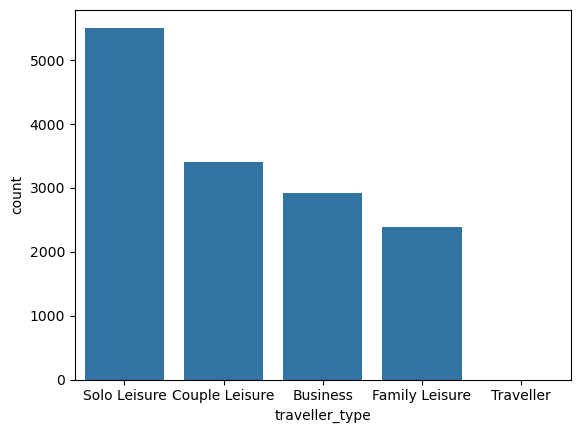

In [36]:
sns.countplot(x='traveller_type', data=df)
plt.show()

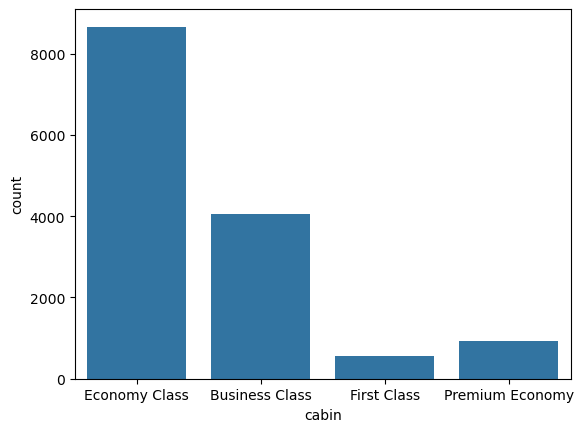

In [37]:
sns.countplot(x='cabin', data=df)
plt.show()

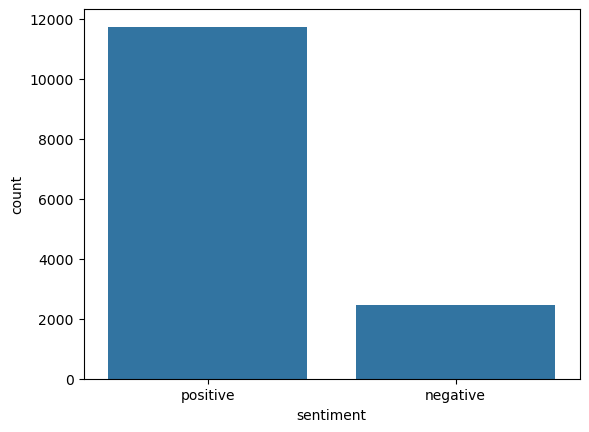

In [38]:
sns.countplot(x='sentiment', data=df)
plt.show()

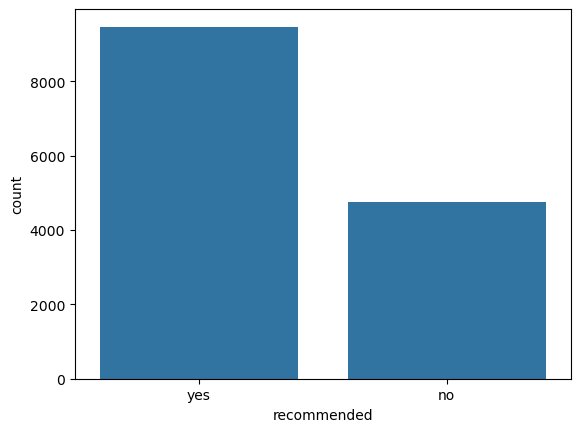

In [39]:
sns.countplot(x='recommended', data=df)
plt.show()

2. Bivariate Distribution

In [41]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,Turkish Airlines,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4,5,5,5,5,5,yes,positive,Boeing
1,Turkish Airlines,2,S Gonser,29 April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3,3,2,3,1,2,no,positive,Boeing
2,Turkish Airlines,6,Sami Osman,29 April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2,3,3,3,3,3,yes,positive,Boeing
3,Turkish Airlines,1,Norka Idalia Orlando,28 April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1,1,1,1,1,1,no,negative,Boeing
4,Turkish Airlines,2,Trevor Khurana,24 April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1,3,2,2,1,1,no,positive,Boeing


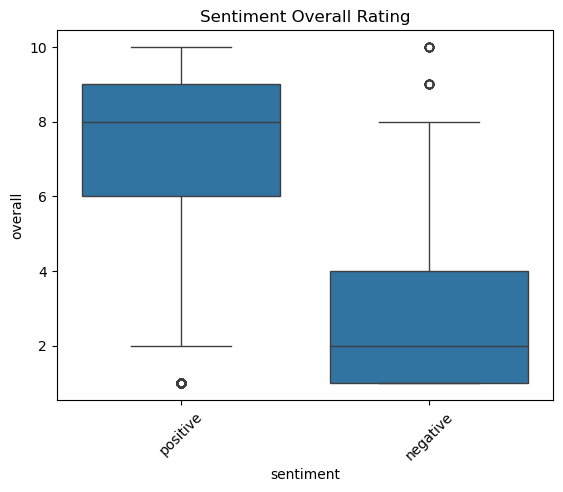

In [42]:
sns.boxplot(data=df, x='sentiment', y='overall')
plt.xticks(rotation=45)
plt.title('Sentiment Overall Rating')
plt.show()

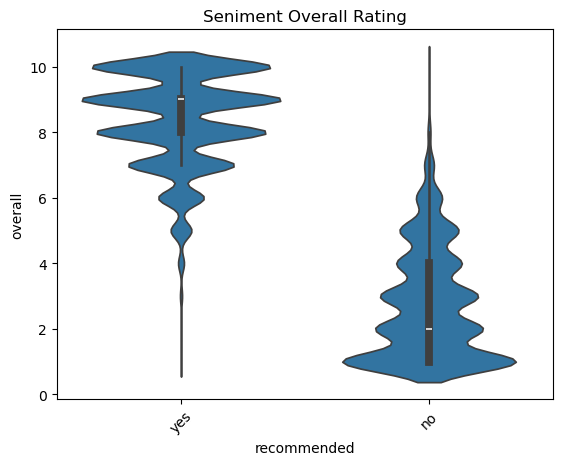

In [43]:
sns.violinplot(data=df, x='recommended', y='overall')
plt.xticks(rotation=45)
plt.title('Seniment Overall Rating')
plt.show()

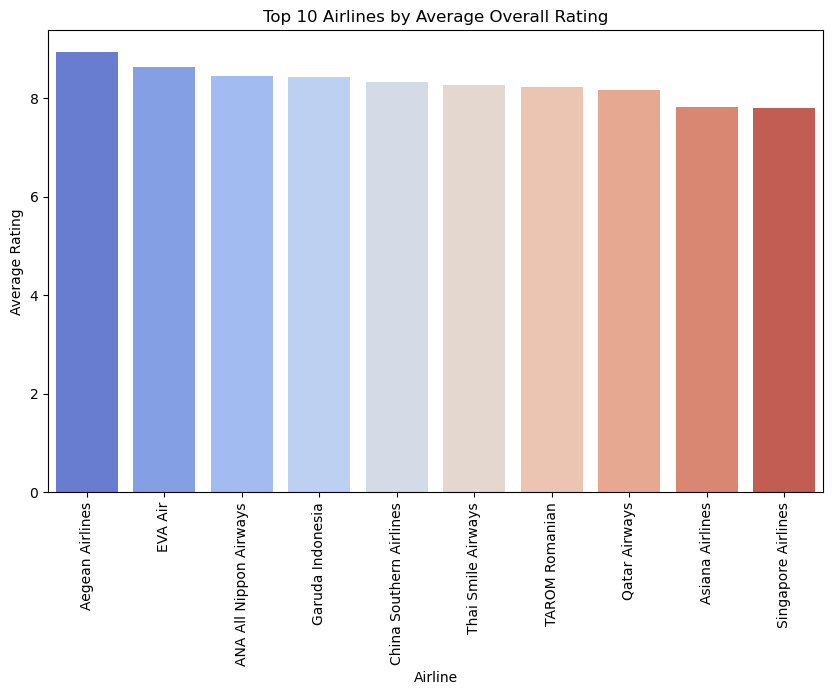

In [44]:
avg_rating = df.groupby('airline')['overall'].mean().reset_index()
avg_rating = avg_rating.sort_values(by='overall', ascending=False)

top_airlines = avg_rating.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_airlines, x='airline', y='overall', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Top 10 Airlines by Average Overall Rating')
plt.xlabel('Airline')
plt.ylabel('Average Rating')
plt.show()

3. Multivariate Distribution

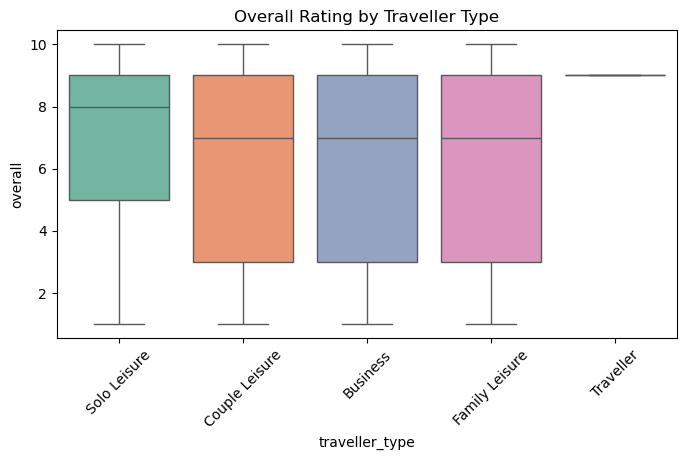

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='traveller_type', y='overall', palette='Set2')
plt.title('Overall Rating by Traveller Type')
plt.xticks(rotation=45)
plt.show()

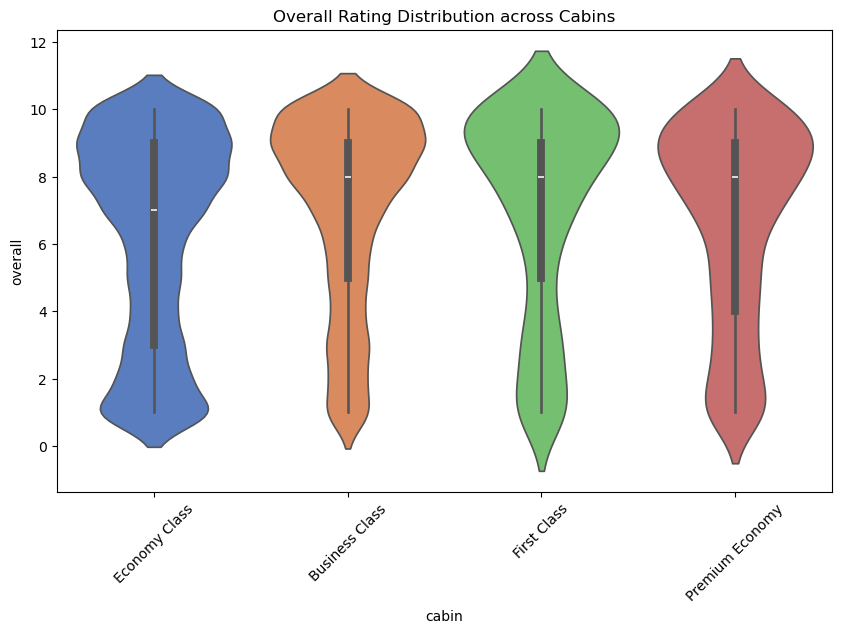

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cabin', y='overall', palette='muted')
plt.title('Overall Rating Distribution across Cabins')
plt.xticks(rotation=45)
plt.show()

Correlation Analysis

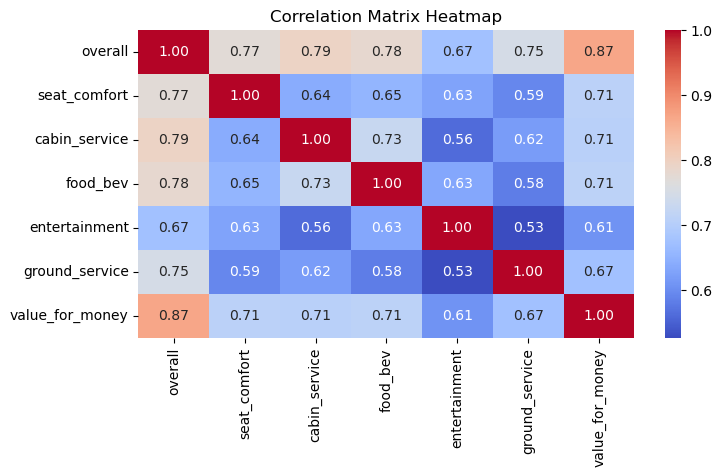

In [49]:
int_columns = df.select_dtypes(include = 'int')
plt.figure(figsize=(8, 4))
correlation_matrix = int_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [50]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,Turkish Airlines,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4,5,5,5,5,5,yes,positive,Boeing
1,Turkish Airlines,2,S Gonser,29 April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3,3,2,3,1,2,no,positive,Boeing
2,Turkish Airlines,6,Sami Osman,29 April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2,3,3,3,3,3,yes,positive,Boeing
3,Turkish Airlines,1,Norka Idalia Orlando,28 April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1,1,1,1,1,1,no,negative,Boeing
4,Turkish Airlines,2,Trevor Khurana,24 April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1,3,2,2,1,1,no,positive,Boeing


In [51]:
rating_cols = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Correlation with overall
correlations = df[rating_cols + ['overall']].corr()['overall'].sort_values(ascending=False)
print(correlations)

overall            1.000000
value_for_money    0.865930
cabin_service      0.792966
food_bev           0.781430
seat_comfort       0.770590
ground_service     0.747551
entertainment      0.673000
Name: overall, dtype: float64


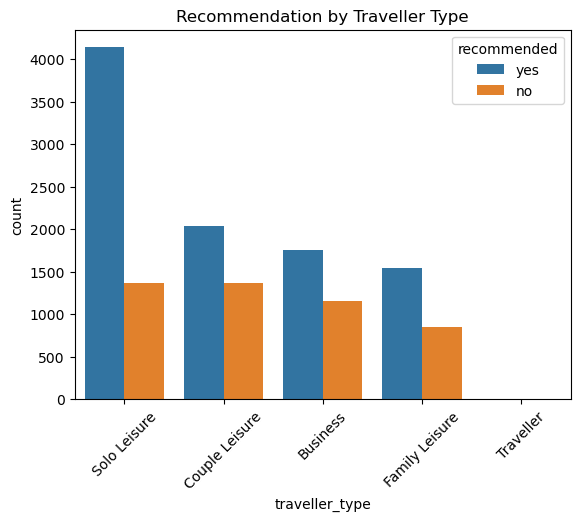

In [52]:
sns.countplot(data=df, x='traveller_type', hue='recommended')
plt.xticks(rotation=45)
plt.title('Recommendation by Traveller Type')
plt.show()

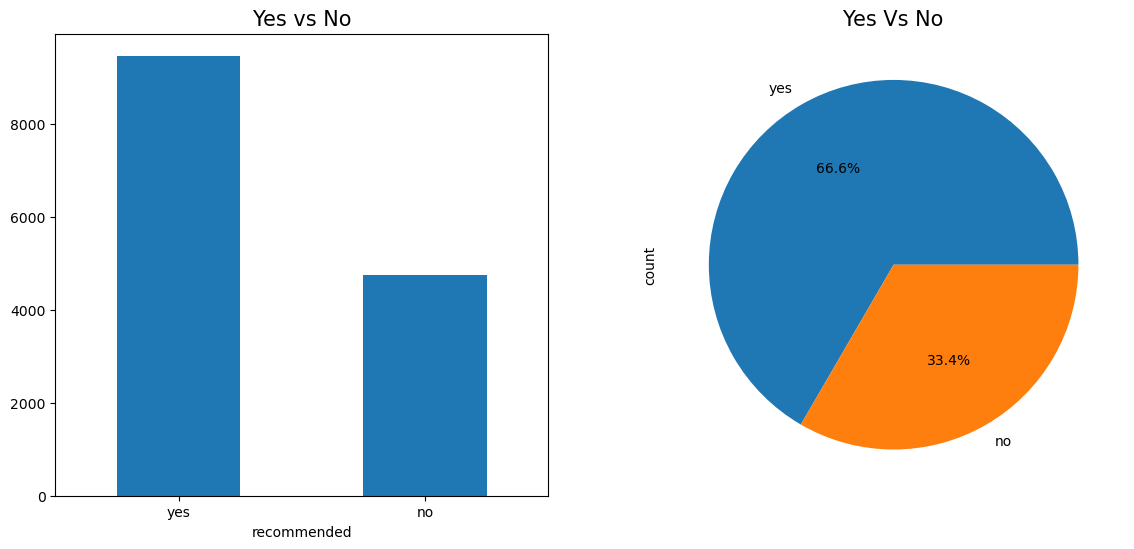

In [53]:
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
df['recommended'].value_counts().plot(kind = 'bar')  # Plotting the bar graph
plt.title("Yes vs No", fontsize = 15)
plt.xticks(rotation = 360)

plt.subplot(1,2,2)
df['recommended'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%') #plotting the pie chart for the same
plt.title("Yes Vs No", fontsize = 15)
plt.show()

Outlier Treatment

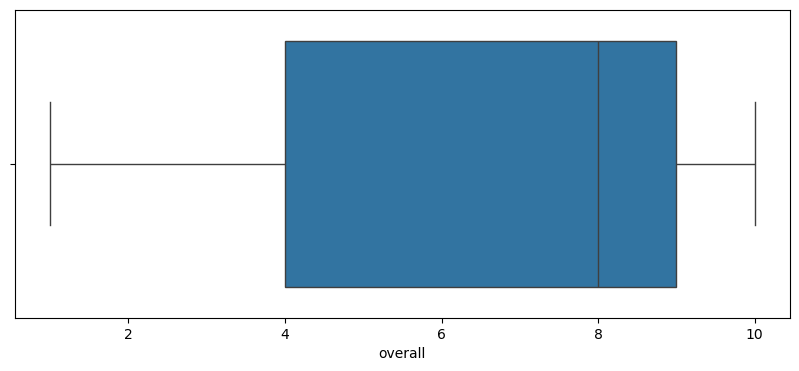

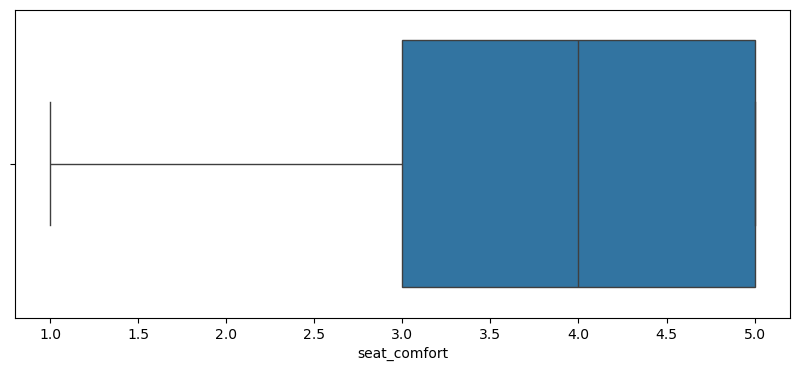

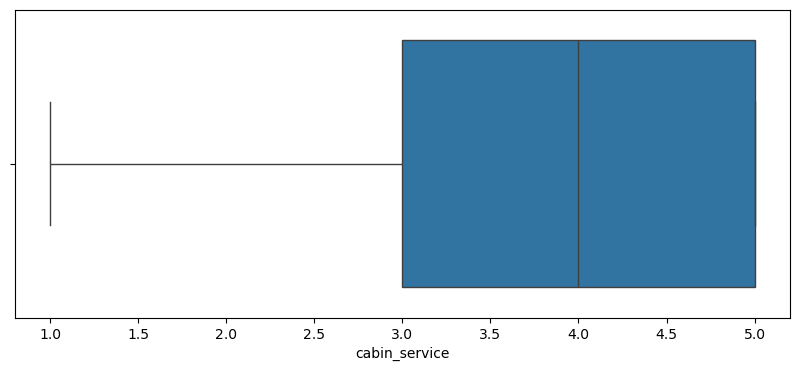

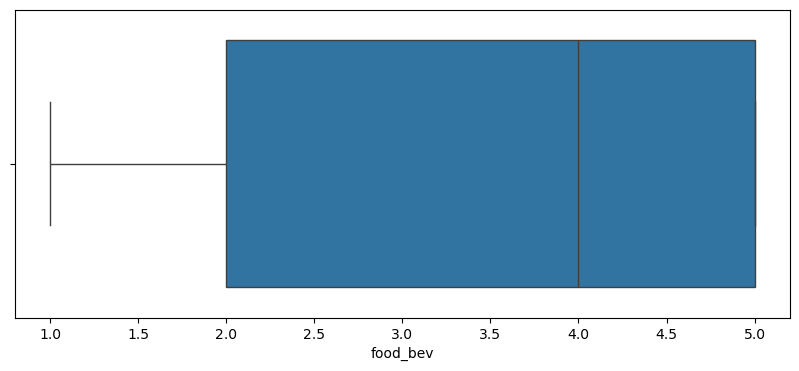

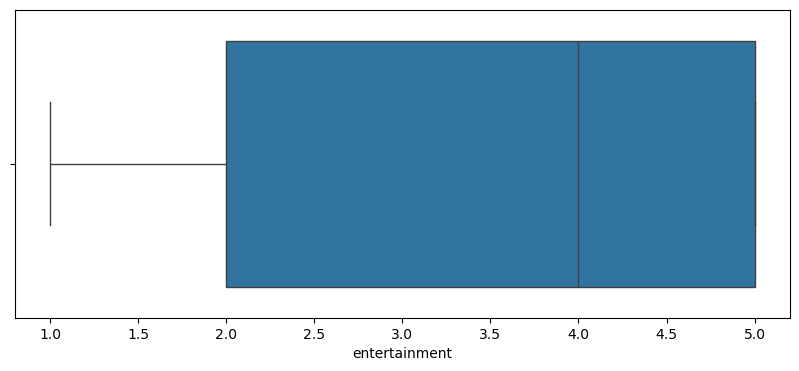

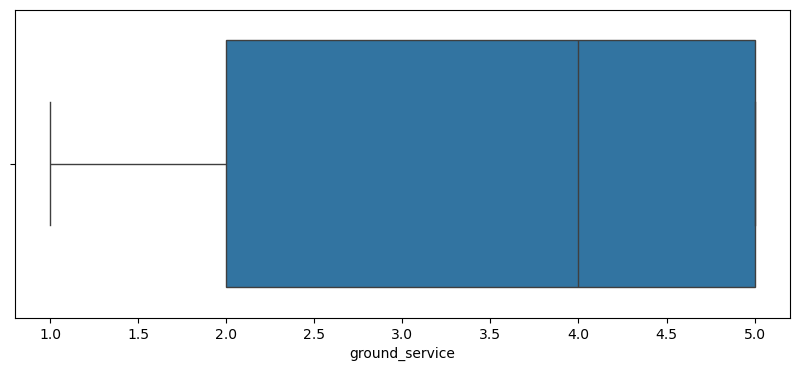

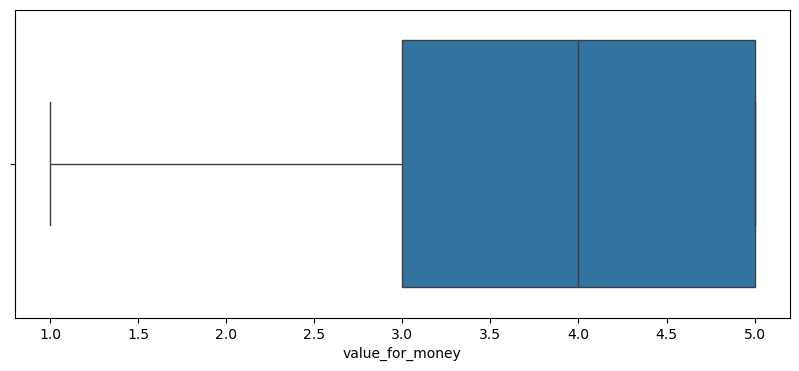

In [55]:
for i in int_columns.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = int_columns[i])
    plt.show()

## Feature Engineering

## **One hot encoding**
### **Label Encoding**
- Each unique category is assigned a unique integer.
- Example: Suppose you have a list of colors:  
  `["Red", "Green", "Blue", "Green", "Red"]`  
  After label encoding:  
  `Red -> 0, Green -> 1, Blue -> 2`  
  Result: `[0, 1, 2, 1, 0]`

---

### **One-Hot Encoding**
- Each category is represented by a binary vector (0s and 1s).
- Example: For the same list of colors `["Red", "Green", "Blue", "Green", "Red"]`, you create separate columns for each category:  
  ```
  Red   Green   Blue
  1      0       0     # Red
  0      1       0     # Green
  0      0       1     # Blue
  0      1       0     # Green
  1      0       0     # Red
  ```

---
- **Label Encoding**: Assigns numbers (0, 1, 2...) to each category.
- **One-Hot Encoding**: Creates separate columns for each category with binary indicators.

In [58]:
df.head(1)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,Turkish Airlines,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4,5,5,5,5,5,yes,positive,Boeing


In [59]:
# One hot encoding
df = pd.get_dummies(df, columns = ['airline',
                                   'aircraft',
                                   'traveller_type','cabin',
                                   'sentiment', 'aircraft_brands'])

In [60]:
df.head()

,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,...,aircraft_brands_er,aircraft_brands_feb,aircraft_brands_neo,"aircraft_brands_new, cabin","aircraft_brands_not, known",aircraft_brands_oeing,aircraft_brands_series,aircraft_brands_sharklets,aircraft_brands_transcontinental,aircraft_brands_unknown
0,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,April 2019,4,5,5,5,5,...,False,False,False,False,False,False,False,False,False,False
1,2,S Gonser,29 April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,April 2019,3,3,2,3,1,...,False,False,False,False,False,False,False,False,False,False
2,6,Sami Osman,29 April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,April 2019,2,3,3,3,3,...,False,False,False,False,False,False,False,False,False,False
3,1,Norka Idalia Orlando,28 April 2019,âœ… Trip Verified | The experience with Turkis...,February 2019,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,2,Trevor Khurana,24 April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,March 2019,1,3,2,2,1,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df.columns

Index(['overall', 'author', 'review_date', 'customer_review', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service',
       ...
       'aircraft_brands_er', 'aircraft_brands_feb', 'aircraft_brands_neo',
       'aircraft_brands_new, cabin', 'aircraft_brands_not, known',
       'aircraft_brands_oeing', 'aircraft_brands_series',
       'aircraft_brands_sharklets', 'aircraft_brands_transcontinental',
       'aircraft_brands_unknown'],
      dtype='object', length=1856)

In [62]:
df.shape

(14215, 1856)

In [63]:
df.head()

,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,...,aircraft_brands_er,aircraft_brands_feb,aircraft_brands_neo,"aircraft_brands_new, cabin","aircraft_brands_not, known",aircraft_brands_oeing,aircraft_brands_series,aircraft_brands_sharklets,aircraft_brands_transcontinental,aircraft_brands_unknown
0,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,April 2019,4,5,5,5,5,...,False,False,False,False,False,False,False,False,False,False
1,2,S Gonser,29 April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,April 2019,3,3,2,3,1,...,False,False,False,False,False,False,False,False,False,False
2,6,Sami Osman,29 April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,April 2019,2,3,3,3,3,...,False,False,False,False,False,False,False,False,False,False
3,1,Norka Idalia Orlando,28 April 2019,âœ… Trip Verified | The experience with Turkis...,February 2019,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,2,Trevor Khurana,24 April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,March 2019,1,3,2,2,1,...,False,False,False,False,False,False,False,False,False,False


In [64]:
# Replacing the dependent variable with 0 and 1
df['recommended'].replace({'no': 0, 'yes': 1}, inplace = True)

In [65]:
df.head()

,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,...,aircraft_brands_er,aircraft_brands_feb,aircraft_brands_neo,"aircraft_brands_new, cabin","aircraft_brands_not, known",aircraft_brands_oeing,aircraft_brands_series,aircraft_brands_sharklets,aircraft_brands_transcontinental,aircraft_brands_unknown
0,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,April 2019,4,5,5,5,5,...,False,False,False,False,False,False,False,False,False,False
1,2,S Gonser,29 April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,April 2019,3,3,2,3,1,...,False,False,False,False,False,False,False,False,False,False
2,6,Sami Osman,29 April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,April 2019,2,3,3,3,3,...,False,False,False,False,False,False,False,False,False,False
3,1,Norka Idalia Orlando,28 April 2019,âœ… Trip Verified | The experience with Turkis...,February 2019,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,2,Trevor Khurana,24 April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,March 2019,1,3,2,2,1,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df['recommended'].value_counts()

recommended
1    9471
0    4744
Name: count, dtype: int64

## Define X and y

In [68]:
df.head(1)

,overall,author,review_date,customer_review,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,...,aircraft_brands_er,aircraft_brands_feb,aircraft_brands_neo,"aircraft_brands_new, cabin","aircraft_brands_not, known",aircraft_brands_oeing,aircraft_brands_series,aircraft_brands_sharklets,aircraft_brands_transcontinental,aircraft_brands_unknown
0,10,Zeshan Shah,06 May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,April 2019,4,5,5,5,5,...,False,False,False,False,False,False,False,False,False,False


In [69]:
X = df.drop(['recommended','customer_review',"author","review_date","date_flown"], axis = 1).values # Set of independent variable
y = df['recommended'].values # Dependent variable

In [70]:
X.shape

(14215, 1851)

In [71]:
y.shape

(14215,)

## Split data into train/test sets

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2,random_state=1)

In [74]:
X_train.shape

(11372, 1851)

In [75]:
X_test.shape

(2843, 1851)

In [76]:
y_train.shape

(11372,)

In [77]:
y_test.shape

(2843,)

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train) # Fitting the model

LogisticRegression()

In [80]:
y_pred = log_reg.predict(X_test) # Predicting the results

In [81]:
#logistic regression Accuracy
print("Trainig Score: ",(log_reg.score(X_train, y_train))*100,"%")
print("Testing Score: ",(log_reg.score(X_test, y_test))*100,"%")

Trainig Score:  95.76151952163208 %
Testing Score:  95.11079845233907 %


## Feature Scaling 

In [83]:
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.transform(X_test) 
'''

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train_scaler = sc.fit_transform(X_train)\nX_test_scaler = sc.transform(X_test) \n'

Standard Scalar Degrading the Model Accuracy

##  Evaluate model performance

Accuracy: 95.11079845233907
Precision: 0.9593202883625128
Recall: 0.968798751950078
F1 Score: 0.9640362225097024
Confusion Matrix:
 [[ 841   79]
 [  60 1863]]


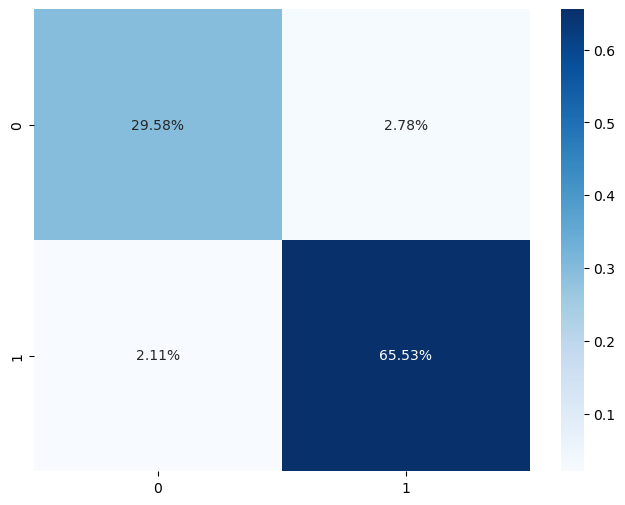

In [86]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall and f1-score score
    acc = metrics.accuracy_score(y_test, y_pred)*100
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    #Display Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    # Visualization of Confusion matrix
    plt.figure(figsize = (8,6))
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,'cm': cm}

# Evaluate Model
logreg_score = evaluate_model(log_reg, X_test, y_test)

# Print result
print('Accuracy:', logreg_score['acc'])
print('Precision:', logreg_score['prec'])
print('Recall:', logreg_score['rec'])
print('F1 Score:', logreg_score['f1'])
print('Confusion Matrix:\n', logreg_score['cm'])

## Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred = dtree.predict(X_test)

In [90]:
#Decision Tree Accuracy
print("Trainig Score: ",(dtree.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dtree.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  94.30179387970455 %


Accuracy: 94.30179387970455
Precision: 0.956927867151012
Recall: 0.9589183567342694
F1 Score: 0.957922077922078
Confusion Matrix:
 [[ 837   83]
 [  79 1844]]


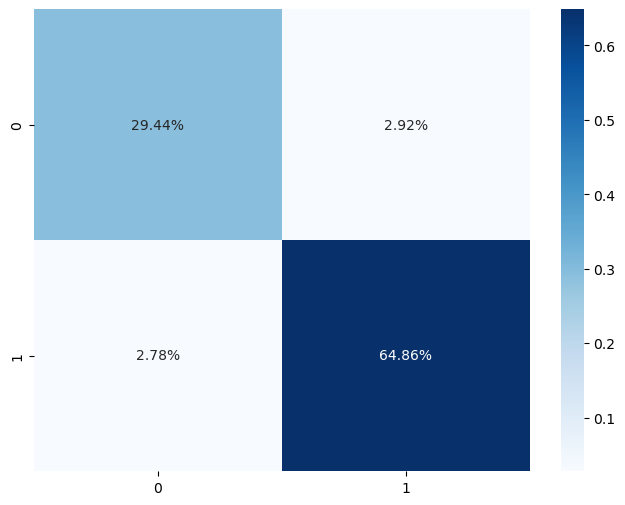

In [91]:
# Evaluate Model performance
dtree_score = evaluate_model(dtree, X_test, y_test)

print('Accuracy:', dtree_score['acc'])
print('Precision:', dtree_score['prec'])
print('Recall:', dtree_score['rec'])
print('F1 Score:', dtree_score['f1'])
print('Confusion Matrix:\n', dtree_score['cm'])

## Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [94]:
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [95]:
# Random Forest Accuracy
print("Trainig Score: ",(rf.score(X_train, y_train))*100,"%")
print("Testing Score: ",(rf.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  95.35701723531481 %


Accuracy: 95.35701723531481
Precision: 0.9666492965085982
Recall: 0.9646385855434217
F1 Score: 0.9656428943258719
Confusion Matrix:
 [[ 856   64]
 [  68 1855]]


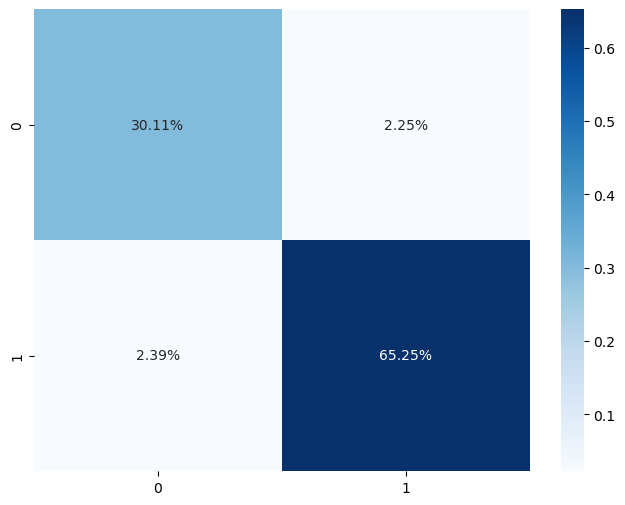

In [96]:
# Evaluate Model performance
rf_score = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_score['acc'])
print('Precision:', rf_score['prec'])
print('Recall:', rf_score['rec'])
print('F1 Score:', rf_score['f1'])
print('Confusion Matrix:\n', rf_score['cm'])

## Support Vector Machine Classifier 

In [98]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [99]:
y_pred = svc.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [100]:
# SVC Accuracy
print("Trainig Score: ",(svc.score(X_train, y_train))*100,"%")
print("Testing Score: ",(svc.score(X_test, y_test))*100,"%")

Trainig Score:  95.51530073865635 %
Testing Score:  95.14597256419275 %


Accuracy: 95.14597256419275
Precision: 0.9593412249099331
Recall: 0.96931877275091
F1 Score: 0.9643041903776514
Confusion Matrix:
 [[ 841   79]
 [  59 1864]]


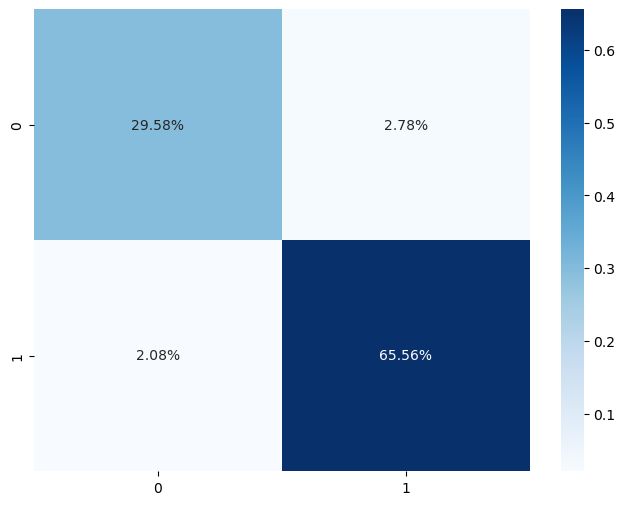

In [101]:
# Evaluate Model performance
svc_score = evaluate_model(svc, X_test, y_test)

print('Accuracy:', svc_score['acc'])
print('Precision:', svc_score['prec'])
print('Recall:', svc_score['rec'])
print('F1 Score:', svc_score['f1'])
print('Confusion Matrix:\n', svc_score['cm'])

## K Nearest Neighbor Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
y_pred = knc.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [105]:
# KNC Accuracy
print("Trainig Score: ",(knc.score(X_train, y_train))*100,"%")
print("Testing Score: ",(knc.score(X_test, y_test))*100,"%")

Trainig Score:  96.03411888849807 %
Testing Score:  95.00527611677805 %


Accuracy: 95.00527611677805
Precision: 0.9625974025974026
Recall: 0.9635985439417577
F1 Score: 0.9630977130977131
Confusion Matrix:
 [[ 848   72]
 [  70 1853]]


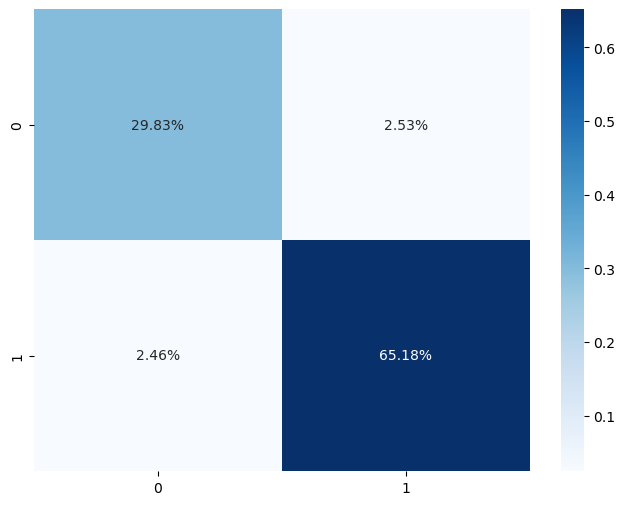

In [106]:
# Evaluate Model performance
knc_score = evaluate_model(knc, X_test, y_test)

print('Accuracy:', knc_score['acc'])
print('Precision:', knc_score['prec'])
print('Recall:', knc_score['rec'])
print('F1 Score:', knc_score['f1'])
print('Confusion Matrix:\n', knc_score['cm'])

## Cross Validation 

In [108]:
from sklearn.model_selection import cross_val_score

print("\nLogistic Regression:")
print("Training cross validation score: ",round(((cross_val_score(log_reg, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(log_reg, X_test, y_test)).mean())*100,2))

print("\nDecision Tree Classifier: ")
print("Training cross validation score: ",round(((cross_val_score(dtree, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(dtree, X_test, y_test)).mean())*100,2))

print("\nRandom Forest Classifier: ")
print("Training cross validation score: ",round(((cross_val_score(rf, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(rf, X_test, y_test)).mean())*100,2))

print("\nSupport Vector Classifier: ")
print("Training cross validation score: ",round(((cross_val_score(svc, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(svc, X_test, y_test)).mean())*100,2))

print("\nK Nearest Neighbor Classifier: ")
print("Training cross validation score: ",round(((cross_val_score(knc, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(knc, X_test, y_test)).mean())*100,2))


Logistic Regression:
Training cross validation score:  95.0
Testing cross validation score:  95.04

Decision Tree Classifier: 
Training cross validation score:  93.52
Testing cross validation score:  93.14

Random Forest Classifier: 
Training cross validation score:  95.58
Testing cross validation score:  94.86

Support Vector Classifier: 
Training cross validation score:  95.19
Testing cross validation score:  94.97

K Nearest Neighbor Classifier: 
Training cross validation score:  94.5
Testing cross validation score:  94.55
